# Modulación AM — Implementación y análisis en Python

Este cuaderno implementa un sistema de modulación en amplitud (AM), muestra señales en el dominio del tiempo y frecuencia, añade ruido, aplica atenuación y distorsión, y contiene explicaciones paso a paso. Este cuaderno corresponde a la Actividad Formativa 4 del curso de Señales y Sistemas.

**Instrucciones**: abre el archivo en Google Colab (`File -> Upload notebook`) y ejecuta todas las celdas. Puedes descargar este `.ipynb` y subirlo directamente a Colab.

## 1) Librerías y parámetros
Se importan NumPy, SciPy y Matplotlib. Ajusta `fs`, `t_max`, `fm` y `fc` si quieres experimentar.

In [22]:
# =========================
# Librerías necesarias
# =========================
# numpy: operaciones matemáticas y vectores
# matplotlib.pyplot: para graficar las señales
# scipy.signal y scipy.fft: para análisis de señales y transformadas de Fourier
# IPython.display: para mostrar contenido en Jupyter/Colab
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
from IPython.display import HTML, display

# Configuración de gráficos: tamaño por defecto
plt.rcParams['figure.figsize'] = (10,4)

# =========================
# Parámetros de muestreo y tiempo
# =========================
fs = 5000        # Frecuencia de muestreo en Hz
t_max = 0.5      # Duración de la señal en segundos
t = np.arange(0, t_max, 1/fs)  # Vector de tiempo desde 0 hasta t_max con pasos de 1/fs

# =========================
# Señal de mensaje (baja frecuencia)
# =========================
fm = 5           # Frecuencia de la señal de mensaje en Hz (puedes modificar)
Am = 1.0         # Amplitud de la señal de mensaje
m_t = Am * np.cos(2*np.pi*fm*t)  # Señal cosenoidal de mensaje

# =========================
# Señal portadora (alta frecuencia)
# =========================
fc = 500         # Frecuencia de la portadora en Hz
Ac = 1.0         # Amplitud de la portadora
c_t = Ac * np.cos(2*np.pi*fc*t)  # Señal cosenoidal de portadora

# =========================
# Información de depuración
# =========================
print('Frecuencia de muestreo:', fs, 'Hz')
print('Duración de la señal:', t_max, 'segundos')
print('Número de muestras:', len(t))


Frecuencia de muestreo: 5000 Hz
Duración de la señal: 0.5 segundos
Número de muestras: 2500


## 2) Graficar señal de mensaje y portadora (dominio del tiempo)

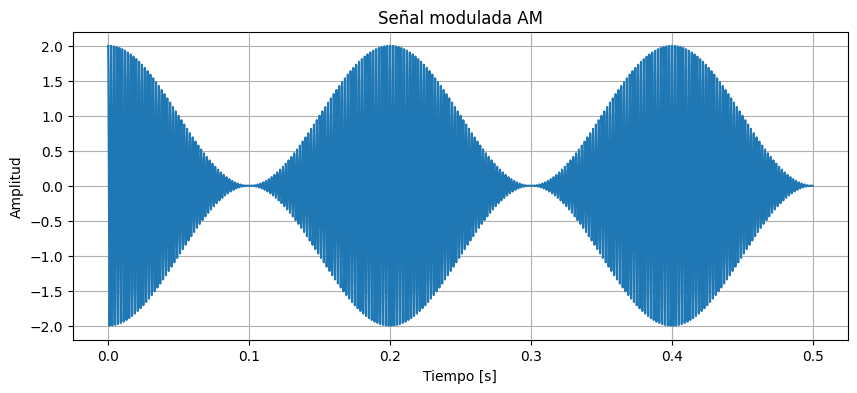

In [16]:
# =========================
# Modulación en amplitud (AM)
# =========================
modulated = (1 + m_t) * c_t  # Señal modulada AM

# Graficar la señal modulada
plt.figure()
plt.plot(t, modulated)
plt.title("Señal modulada AM")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()




## 3) Modulación AM (DSB-TR) — clásica: s(t) = (1 + m(t)) * c(t)
Se recomienda asegurarse que |m(t)| <= 1 para evitar sobre-modulación. Aquí usamos m(t) con Am=1 y llevamos la portadora a 1+ m(t).

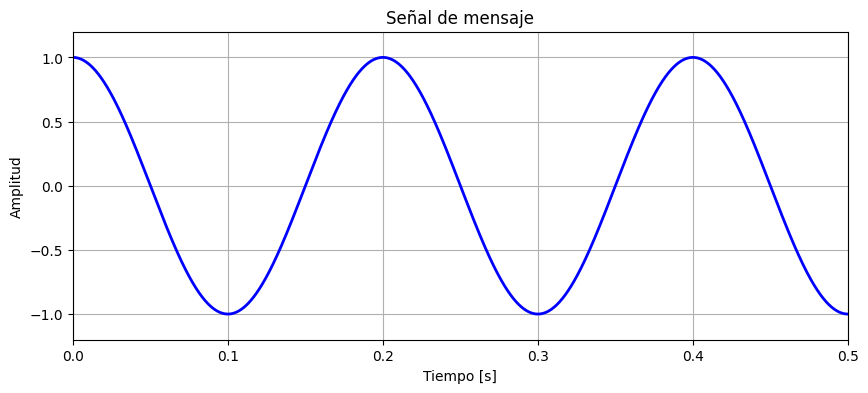

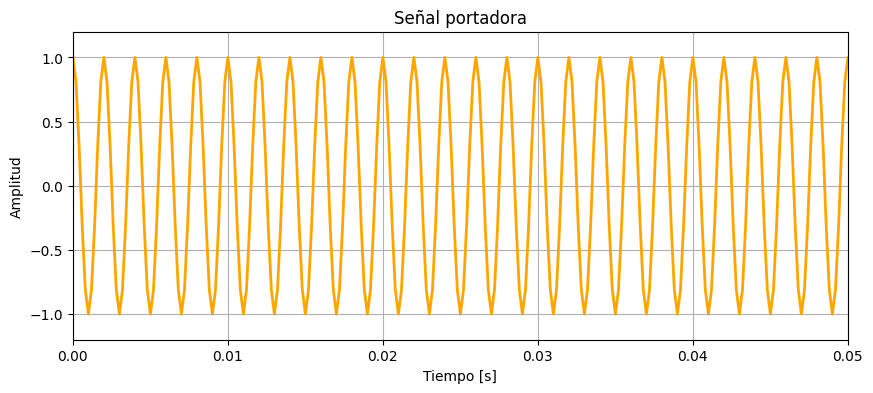

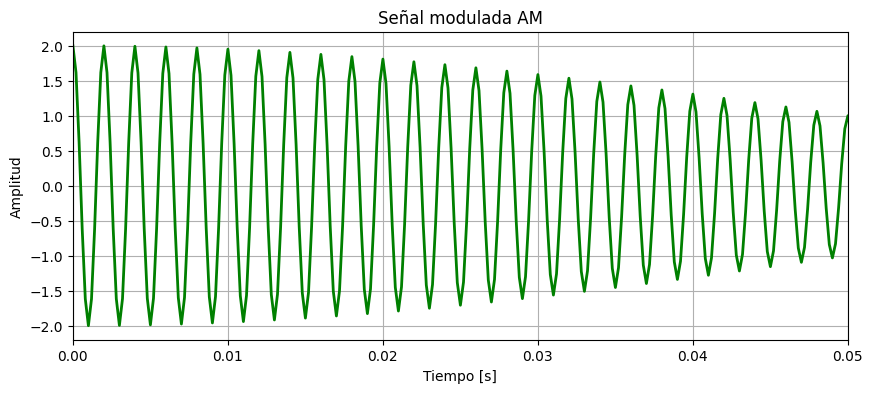

In [17]:
# =========================
# Bloque 3: Visualización de señales
# =========================

# Graficar señal de mensaje
plt.figure()
plt.plot(t, m_t, color='blue', linewidth=2)  # Color y grosor igual al original
plt.title("Señal de mensaje")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.5)  # Ajuste de eje X igual que la original
plt.ylim(-1.2, 1.2)  # Ajuste de eje Y para que coincida con la escala
plt.grid(True)

# Graficar señal portadora
plt.figure()
plt.plot(t, c_t, color='orange', linewidth=2)  # Mantener color y grosor
plt.title("Señal portadora")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.05)  # Mostrar solo un pequeño fragmento para apreciar la alta frecuencia
plt.ylim(-1.2, 1.2)
plt.grid(True)

# Graficar señal modulada AM
plt.figure()
plt.plot(t, modulated, color='green', linewidth=2)  # Mantener consistencia de estilo
plt.title("Señal modulada AM")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.05)  # Igual que en la portadora para comparar
plt.ylim(-2.2, 2.2)  # Ajuste de amplitud de la modulada
plt.grid(True)
plt.show()




## 4) Espectro en frecuencia (FFT) — mostrar magnitud y detectar bandas laterales

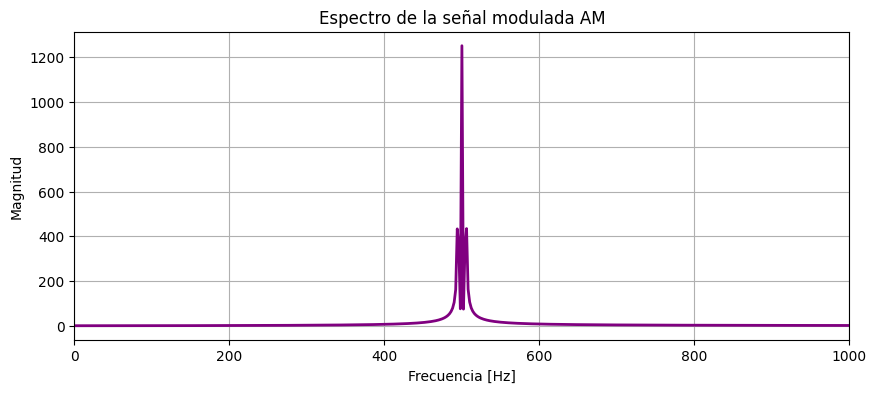

In [18]:
# =========================
# Bloque 4: Transformada de Fourier
# =========================
N = len(t)  # Número de muestras
freq = fftfreq(N, 1/fs)  # Vector de frecuencias
mod_fft = fft(modulated)  # FFT de la señal modulada

plt.figure()
plt.plot(freq[:N//2], np.abs(mod_fft)[:N//2], color='purple', linewidth=2)  # Estilo consistente
plt.title("Espectro de la señal modulada AM")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.xlim(0, 1000)  # Ajuste de eje X para ver claramente las componentes principales
plt.show()



## 5) Introducir ruido (ruido blanco aditivo) y comparar

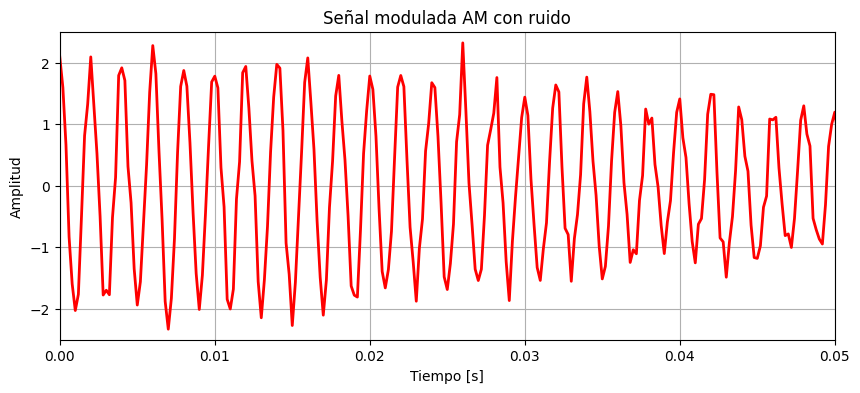

In [19]:
# =========================
# Bloque 5: Señal modulada con ruido
# =========================
noise = 0.2 * np.random.randn(len(modulated))  # Ruido gaussiano
noisy_signal = modulated + noise

plt.figure()
plt.plot(t, noisy_signal, color='red', linewidth=2)  # Mantener estilo
plt.title("Señal modulada AM con ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.05)  # Mostrar detalle de la señal
plt.ylim(-2.5, 2.5)  # Ajuste de amplitud para que no se vea recortada
plt.grid(True)
plt.show()



## 6) Atenuación y distorsión
- Atenuación: multiplicar la señal por un factor <1
- Distorsión: ejemplo sencillo, saturación (clipping) o no linealidad (p. ej. elevando a una potencia)


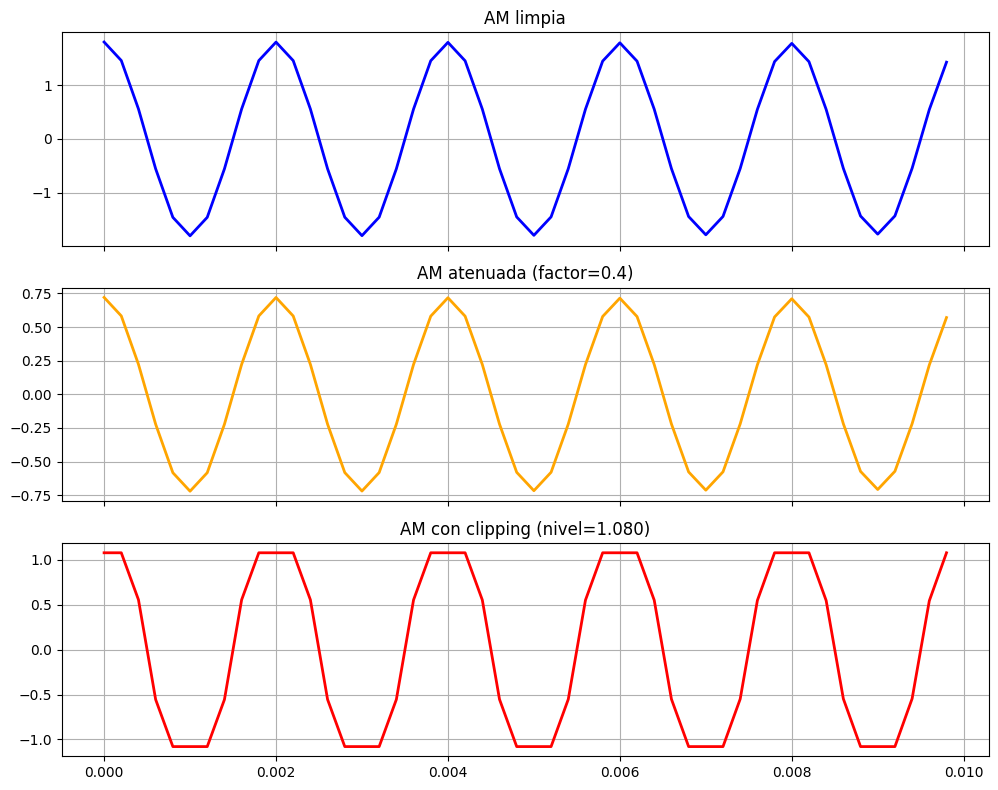

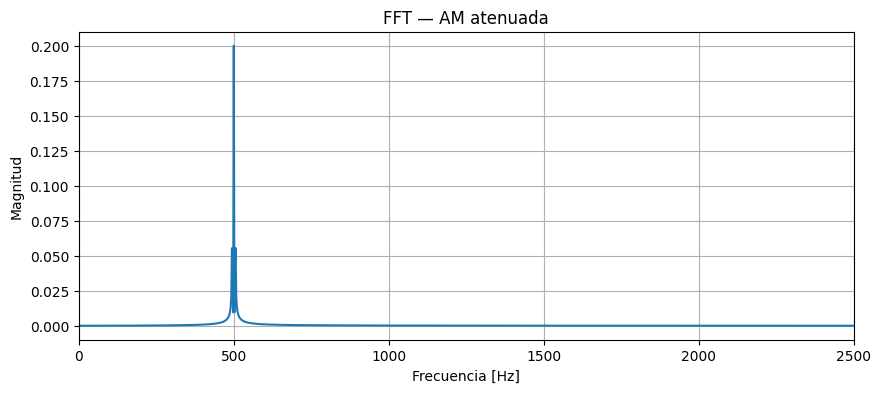

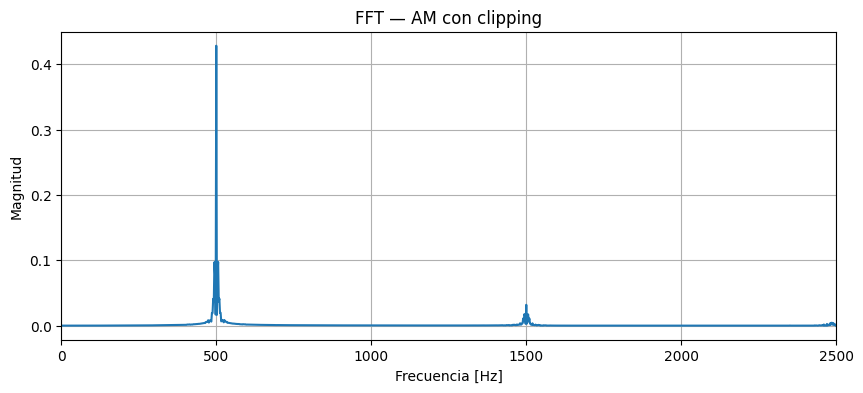

In [20]:
# =========================
# Bloque 6: Atenuación y distorsión (clipping)
# =========================

# Atenuación
att_factor = 0.4  # Factor de atenuación: reduce la amplitud de la señal
s_att = att_factor * s_t  # Señal atenuada

# Distorsión por clipping
clip_level = 0.6 * np.max(np.abs(s_t))  # Nivel de clipping (60% del máximo)
s_clip = np.clip(s_t, -clip_level, clip_level)  # Señal limitada/clipped

# =========================
# Graficar señales AM: limpia, atenuada y con clipping
# =========================
fig, axs = plt.subplots(3,1, figsize=(10,8), sharex=True)

# Señal AM original
axs[0].plot(t[:zoom_samples], s_t[:zoom_samples], color='blue', linewidth=2)
axs[0].set_title('AM limpia')

# Señal AM atenuada
axs[1].plot(t[:zoom_samples], s_att[:zoom_samples], color='orange', linewidth=2)
axs[1].set_title(f'AM atenuada (factor={att_factor})')

# Señal AM con clipping
axs[2].plot(t[:zoom_samples], s_clip[:zoom_samples], color='red', linewidth=2)
axs[2].set_title(f'AM con clipping (nivel={clip_level:.3f})')

# Activar cuadrícula en todas las subplots
for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()

# =========================
# Análisis de frecuencia de señales atenuadas y con clipping
# =========================
# Usamos la función plot_fft previamente definida
plot_fft(s_att, fs, 'FFT — AM atenuada')
plot_fft(s_clip, fs, 'FFT — AM con clipping')


## 7) Demodulación AM (envolvente) — recuperación de la señal de mensaje

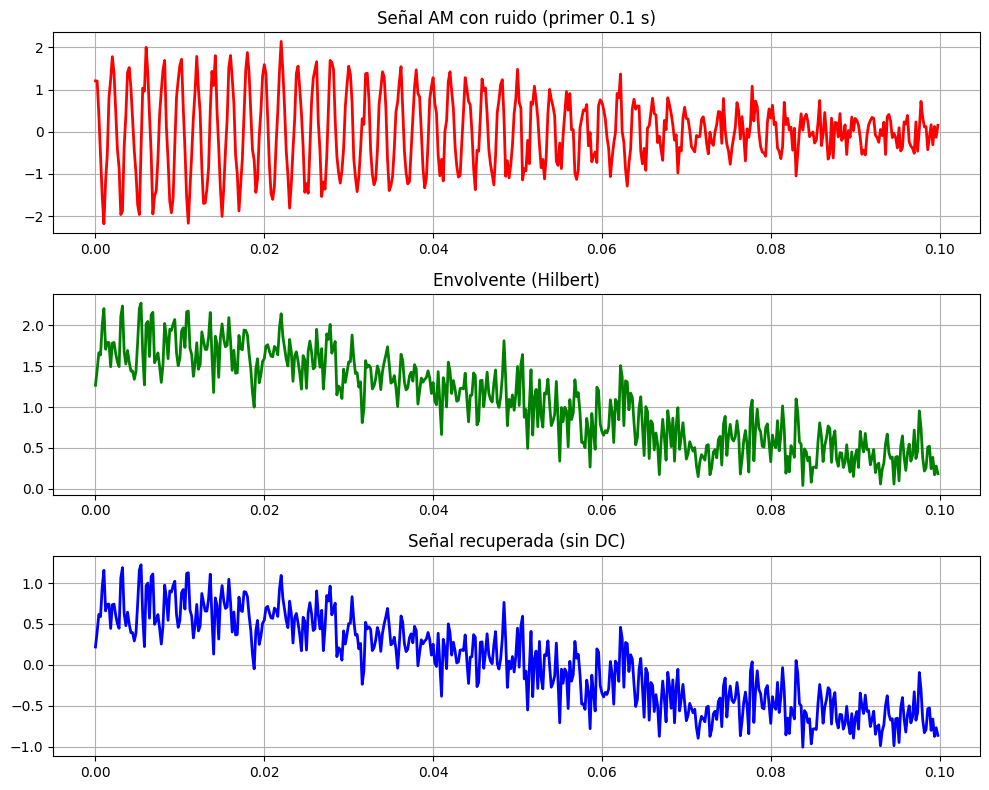

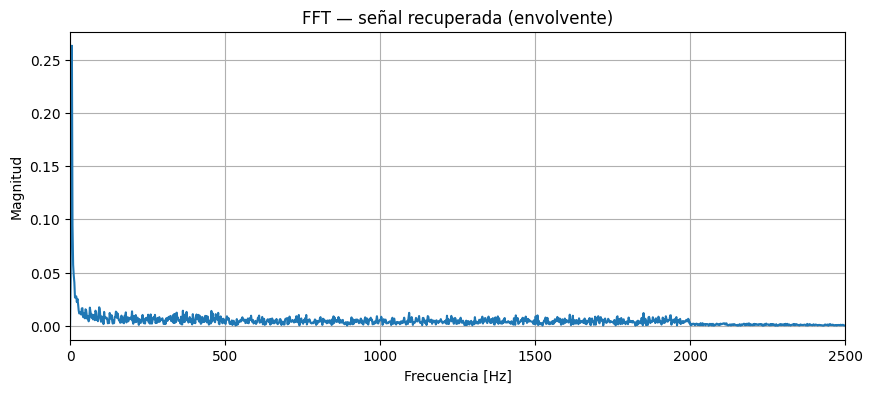

In [21]:
# =========================
# Bloque 7: Demodulación por detección de envolvente
# =========================
from scipy.signal import hilbert  # Transformada de Hilbert para calcular la envolvente

# Señal analítica usando Hilbert
analytic = hilbert(s_noisy)  # s_noisy: señal AM con ruido
envelope = np.abs(analytic)  # Envolvente de la señal AM

# Eliminar offset de la portadora (DC) para recuperar la señal de mensaje
recovered = envelope - np.mean(envelope)

# =========================
# Graficar la señal con ruido, la envolvente y la señal recuperada
# =========================
fig, axs = plt.subplots(3,1, figsize=(10,8))

# Señal AM con ruido (primeros 0.1 s para mejor visualización)
axs[0].plot(t[:int(0.1*fs)], s_noisy[:int(0.1*fs)], color='red', linewidth=2)
axs[0].set_title('Señal AM con ruido (primer 0.1 s)')

# Envolvente obtenida con Hilbert
axs[1].plot(t[:int(0.1*fs)], envelope[:int(0.1*fs)], color='green', linewidth=2)
axs[1].set_title('Envolvente (Hilbert)')

# Señal recuperada (sin componente DC)
axs[2].plot(t[:int(0.1*fs)], recovered[:int(0.1*fs)], color='blue', linewidth=2)
axs[2].set_title('Señal recuperada (sin DC)')

# Activar cuadrícula en todas las subplots
for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()

# =========================
# Análisis de frecuencia de la señal recuperada
# =========================
plot_fft(recovered, fs, 'FFT — señal recuperada (envolvente)')

